<center>
<h1>ĐỒ ÁN CUỐI KÌ: LẬP TRÌNH CHO KHOA HỌC DỮ LIỆU</h1>
</center>

| MSSV     | Họ và tên       | Phân công | Link GitHub profile |
|----------|---------------- | --------- | ------------------- |
| 19120725  | Lê Trường Vũ   | Tiền xử lý dữ liệu và làm câu hỏi 1, 2 | https://github.com/LeTruongVu2k1 |
| 19120615 | Hùng Ngọc Phát  | Tiền xử lý cột `duration`, `episodes` và làm câu hỏi 3, 4 | https://github.com/hungngocphat01 |

Các giai đoạn làm việc:

| Từ ngày | Đến ngày | Công việc         | Người thực hiện |
|---------|----------|-------------------|-----------------|
| 12/1    | 13/1     | Tiền xử lý dữ liệu | Lê Trường Vũ |
| 13/1    | 13/1     | Khám phá dữ liệu (xem xét một số cột) | Hùng Ngọc Phát |
| 13/1    | 17/1     | Hoàn thành các câu hỏi | Cả 2 |
| 17/1    | 19/1     | Một số nâng cấp và sửa lỗi nhỏ | Cả 2 |
| 20/1    | 21/1     | Hoàn thiện đồ án theo góp ý | Cả 2 |
| 21/1    |          | Kết thúc đồ án |
| 22/1    |          | Vấn đáp |

[https://github.com/hungngocphat01/HCMUS-Prog4DataSc-FinalProj](https://github.com/hungngocphat01/HCMUS-Prog4DataSc-FinalProj)

## Môi trường code

<font color="red">Notebook chạy hoàn toàn bình thường với môi trường <code>min_ds-env</code></font>

In [1]:
import sys
sys.executable

'/home/hellolinux/miniconda3/envs/min_ds-env/bin/python'

---

## Import các thư viện cần thiết

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from ast import literal_eval

sns.set()

---

## Thu thập dữ liệu

Nhóm sẽ dùng [dữ liệu đã được thu thập sẵn](https://www.kaggle.com/azathoth42/myanimelist) là file `AnimeList.csv` đính kèm. Đây là bộ dữ liệu chứa những thông tin về các anime (hoạt hình Nhật Bản)....

Dữ liệu này là được thu thập từ MyAnimeList, là một trang web khá lớn để quản lý những bộ anime/manga đã "cày". MyAnimeList thì được cập nhật hàng ngày, còn dataset này thì được cập nhật lần cuối vào năm 2018.

### License của dữ liệu

Theo như trên Kaggle thì dữ liệu được phân phối dưới license [Database Contents License (DbCL)](https://opendatacommons.org/licenses/dbcl/1-0/).

> 2.1 Rights granted. **The Licensor grants to You** a worldwide, royalty-free, non-exclusive, perpetual, irrevocable copyright **license to do any act that is restricted by copyright over anything within the Contents**, whether in the original medium or any other. These rights explicitly include commercial use, and **do not exclude any field of endeavour**. These rights include, without limitation, the right to sublicense the work.

Có nghĩa là người cung cấp dataset cho phép chúng ta làm bất cứ điều gì với dữ liệu này, miễn không vi phạm các quy định về bản quyền.

---

## Khám phá dữ liệu

### Đọc dữ liệu từ file csv vào dataframe

In [3]:
animes_df = pd.read_csv('AnimeList.csv')
animes_df.head()

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,...,Inu x Boku SS was licensed by Sentai Filmworks...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ..."
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,...,NaN,Spring 2007,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi..."
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,...,NaN,Fall 2008,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ..."
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,...,Princess Tutu aired in two parts. The first pa...,Summer 2002,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ..."
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,...,NaN,Fall 2012,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)..."


### Dữ liệu gồm có bao nhiêu dòng và bao nhiêu cột? 

In [4]:
num_cols = len(animes_df.columns)
num_rows = len(animes_df.index)
print('Số dòng: ',num_rows)
print('Số cột: ',num_cols)

Số dòng:  14478
Số cột:  31


### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Theo như mô tả của dữ liệu thì một dòng cho biết thông tin của một 'Anime'. Có vẻ như không có dòng nào bị 'lạc loài'

### Dữ liệu có các dòng bị lặp không? 

Nhóm sẽ kiểm tra vụ này và lưu kết quả vào biến `have_duplicated_rows`. Biến này sẽ có giá trị True nếu dữ liệu có các dòng bị lặp và có giá trị False nếu ngược.

In [5]:
have_duplicated_row = all(animes_df.duplicated())
have_duplicated_row

False

Như vậy nghĩa là không có dòng nào bị lặp

### Mỗi cột có ý nghĩa gì?

- `anime_id`: ID của anime trong cơ sở dữ liệu của MyAnimeList.
- `title`: tên phiên âm tiếng Nhật của anime.
- ~~`title_english`: tên dịch tiếng Anh của anime.~~
- ~~`title_japanese`: tên tiếng Nhật (bằng kana/kanji) của anime.~~
- ~~`title_synonyms`: những tên gọi khác của anime.~~
- `image_url`: link đến "ảnh đại diện" của anime trên MyAnimeList.
- `type`: thể loại của anime (TV, movies, OVA, ...).
- `source`: nguồn gốc của anime (là original hay là adaption từ light novel hoặc manga).
- ~~`status`: trạng thái phát sóng của anime dưới dạng chuỗi (tại thời điểm dữ liệu này được thu thập).~~
- `airing`: trạng thái phát sóng của anime (giống như trên) nhưng dưới dạng bool.
- `aired_string`: khoảng thời gian mà anime đã phát sóng (từ ngày nào đến ngày nào).
- ~~`aired`: giống `aired_string`, nhưng dưới dạng json.~~
- `duration`: độ dài của một tập.
- `rating`: giới hạn độ tuổi khi xem (G, PG, PG-13, R-18, ...).
- `score`: điểm số [có trọng số](https://myanimelist.net/info.php?go=topanime) của anime trên thang 10, chấm bởi người dùng.
- `members`: số lượng người đã thêm anime này vào list của họ.
- `favourite`: số lượng người đã đánh dấu anime này là "yêu thích".
- `scored_by`: số lượng người đã chấm điểm cho anime.
- `rank`: thứ hạng của anime, sắp xếp theo score.
- `popularity`: thứ hạng của anime, sắp xếp theo members.
- `background`: chú thích về background của anime (ví dụ như anime này đã có còn phần nào khác hay không)?
- `episodes`: số tập của anime.
- `premiered`: anime đã được công bố vào _mùa_ nào (mùa anime trùng với mùa khí hậu theo lịch Nhật - đông, xuân, hạ, thu).
- `broadcast`: lịch phát sóng.
- `producer`: nhà sản xuất anime (về mặt nội dung). 
- `studio`: công ty tiến hành sản xuất (vẽ) và phân phối anime.
- `genre`: danh sách các thể loại anime.
- `opening_theme`: danh sách các bài hát mở đầu của anime.
- `ending_theme`: danh sách các bài hát kết thúc của anime.
- `licensor`: công ty được cấp phép để phát hành anime ở một khu vực cụ thể (ngoài Nhật Bản)
- ~~`related`: các anime có liên quan đến (phần sau, phần trước,...)~~

Các cột bị gạch bỏ là các cột có vẻ như trùng thông tin với các cột khác về mặt mô tả dữ liệu.

---

### Xóa đi các cột "không cần thiết"

In [6]:
del_cols = ['title_english', 'title_japanese', 'title_synonyms', 'status', 'aired', 'related']
animes_df = animes_df.drop(del_cols, axis=1)
animes_df.set_index('anime_id', inplace=True)
animes_df.head()

,title,image_url,type,source,episodes,airing,aired_string,duration,rating,score,...,favorites,background,premiered,broadcast,producer,licensor,studio,genre,opening_theme,ending_theme
anime_id,,,,,,,,,,,,,,,,,,,,,
11013,Inu x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,False,"Jan 13, 2012 to Mar 30, 2012",24 min. per ep.,PG-13 - Teens 13 or older,7.63,...,2809,Inu x Boku SS was licensed by Sentai Filmworks...,Winter 2012,Fridays at Unknown,"Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ..."
2104,Seto no Hanayome,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,False,"Apr 2, 2007 to Oct 1, 2007",24 min. per ep.,PG-13 - Teens 13 or older,7.89,...,2579,NaN,Spring 2007,Unknown,"TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi..."
5262,Shugo Chara!! Doki,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,False,"Oct 4, 2008 to Sep 25, 2009",24 min. per ep.,PG - Children,7.55,...,802,NaN,Fall 2008,Unknown,"TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ..."
721,Princess Tutu,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,False,"Aug 16, 2002 to May 23, 2003",16 min. per ep.,PG-13 - Teens 13 or older,8.21,...,3344,Princess Tutu aired in two parts. The first pa...,Summer 2002,Fridays at Unknown,"Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ..."
12365,Bakuman. 3rd Season,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,False,"Oct 6, 2012 to Mar 30, 2013",24 min. per ep.,PG-13 - Teens 13 or older,8.67,...,2082,NaN,Fall 2012,Unknown,"NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)..."


In [7]:
num_cols = len(animes_df.columns)
num_rows = len(animes_df.index)
print('Số dòng: ',num_rows)
print('Số cột: ',num_cols)

Số dòng:  14478
Số cột:  24


### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

`dtype` của mỗi cột trong `animes_df` sẽ lưu kết quả vào series `col_dtypes`; series này có index là tên cột.

In [8]:
col_dtypes = animes_df.dtypes
col_dtypes

title             object
image_url         object
type              object
source            object
episodes           int64
airing              bool
aired_string      object
duration          object
rating            object
score            float64
scored_by          int64
rank             float64
popularity         int64
members            int64
favorites          int64
background        object
premiered         object
broadcast         object
producer          object
licensor          object
studio            object
genre             object
opening_theme     object
ending_theme      object
dtype: object

Như vậy `animes_df` có 16 cột có `dtype` `object` gồm: "title", "image_url", "type", "source", "aired_string", "duration", "rating", "background", "premiered", "broadcast", "producer", "licensor", "studio", "genre", "opening_theme", "ending_theme".
Để tìm hiểu 'dtype' thật sự của các phần tử trong các cột này, nhóm viết hàm `open_object_dtype` nhận đầu vào là một cột `s` (series) có `dtype` là `object` và trả về tập các kiểu dữ liệu thật sự có trong cột này

In [9]:
def open_object_dtype(s):
    dtypes = set()
    dtypes = set(s.apply(type))   
    return dtypes

In [10]:
print('title: ',open_object_dtype(animes_df['title']))
print('image_url: ',open_object_dtype(animes_df['image_url']))
print('type: ',open_object_dtype(animes_df['type']))
print('source: ',open_object_dtype(animes_df['source']))
print('aired_string: ',open_object_dtype(animes_df['aired_string']))
print('duration: ',open_object_dtype(animes_df['duration']))
print('rating: ',open_object_dtype(animes_df['rating']))
print('background: ',open_object_dtype(animes_df['background']))
print('premiered: ',open_object_dtype(animes_df['premiered']))
print('broadcast: ',open_object_dtype(animes_df['broadcast']))
print('producer: ',open_object_dtype(animes_df['producer']))
print('licensor: ',open_object_dtype(animes_df['licensor']))
print('studio: ',open_object_dtype(animes_df['studio']))
print('genre: ',open_object_dtype(animes_df['genre']))
print('opening_theme: ',open_object_dtype(animes_df['opening_theme']))
print('ending_theme: ',open_object_dtype(animes_df['ending_theme']))

title:  {<class 'str'>}
image_url:  {<class 'str'>, <class 'float'>}
type:  {<class 'str'>}
source:  {<class 'str'>}
aired_string:  {<class 'str'>}
duration:  {<class 'str'>}
rating:  {<class 'str'>}
background:  {<class 'str'>, <class 'float'>}
premiered:  {<class 'str'>, <class 'float'>}
broadcast:  {<class 'str'>, <class 'float'>}
producer:  {<class 'str'>, <class 'float'>}
licensor:  {<class 'str'>, <class 'float'>}
studio:  {<class 'str'>, <class 'float'>}
genre:  {<class 'str'>, <class 'float'>}
opening_theme:  {<class 'str'>}
ending_theme:  {<class 'str'>}


Những cột vừa có kiểu `float` vừa có kiểu `str` có khả năng sẽ chứa `NaN`.

---

## Tiền xử lý

### Chuyển dtype của cột "aired" sang datetime

Ta sẽ chia cột `aired` thành hai cột riêng nữa là `aired_from` và `aired_to`<br>
Sau đó thì chuyển `dtype` của hai cột này sang `datetime`

In [11]:
animes_df['aired_string'].head()

anime_id
11013    Jan 13, 2012 to Mar 30, 2012
2104       Apr 2, 2007 to Oct 1, 2007
5262      Oct 4, 2008 to Sep 25, 2009
721      Aug 16, 2002 to May 23, 2003
12365     Oct 6, 2012 to Mar 30, 2013
Name: aired_string, dtype: object

In [12]:
# Tách cột aired sang 2 cột aired_from, aired_to và thêm vào animes_df
animes_df[['aired_from', 'aired_to']] = animes_df['aired_string'].str.split('to', 1, expand = True)
# Chuyển dtype sang datetime
animes_df['aired_from'] = pd.to_datetime(animes_df['aired_from'], errors='coerce')
animes_df['aired_to'] = pd.to_datetime(animes_df['aired_to'], errors='coerce')

In [13]:
print('aired_from type: ',animes_df['aired_from'].dtype)
print('aired_to type: ', animes_df['aired_from'].dtype)

aired_from type:  datetime64[ns]
aired_to type:  datetime64[ns]


Sau khi đã tách xong thì ta sẽ xóa luôn cột `aired_string` do không cần thiết nữa

In [14]:
del animes_df['aired_string']

### Chuyển các phần tử trong cột "opening_theme" , "ending_theme", "genre", "studio" và "producer" sang dạng list

Hiện tại thì các phần tử trong cột `opening_theme` và `ending_theme` có dạng `str`khá đặc biệt. <br>

Vd:<br> 
`"['#1: "Minna no Tamago (みんなのたまご)" by Shugo Chara Egg (eps 1-13)',
 '#2: "Shugo Shugo! (しゅごしゅご!)" by Shugo Chara Egg (eps 14-25)',
 '#3: "Omakase♪Guardian (おまかせ♪ガーディアン)" by Guardians 4 (eps 26-38)',
 '#4: "School Days" by Guardians 4 (eps 39-51)']"`

In [15]:
animes_df['opening_theme'] = animes_df['opening_theme'].apply(literal_eval)
animes_df['ending_theme'] = animes_df['ending_theme'].apply(literal_eval)

Trong cột 'genre', 'studio' và 'producer' có giá trị NaN và ta sẽ không tác động đến các dòng này vì nó sẽ làm sai lệch thông tin về giá trị thiếu.

In [16]:
# Lấy các dòng chứa "NaN"
genre_na = animes_df.genre.isna()
# Chuyển các dòng không "NaN" của cột "genre" sang list 
animes_df.loc[~genre_na, 'genre'] = animes_df.loc[~genre_na, 'genre'].str.split(',\s*')

In [17]:
producer_na = animes_df.producer.isna()
animes_df.loc[~producer_na, 'producer'] = animes_df.loc[~producer_na, 'producer'].str.split(',\s*')

In [18]:
studio_na = animes_df.studio.isna()
animes_df.loc[~studio_na, 'studio'] = animes_df.loc[~studio_na, 'studio'].str.split(',\s*')

Lý do phải dùng regex `',\s*'` là vì cột này có mỗi hàng là một chuỗi biểu diễn danh sách các genre của anime được cách nhau bởi dấu phẩy, và đa phần trường hợp sẽ có cả dấu cách. Regex trên sẽ match dấu phẩy và có thể có _0 hoặc nhiều dấu cách_ (để cho tổng quát hơn).

In [19]:
# Danh sách tất cả genre
animes_df['genre'].explode().value_counts()

Comedy           5251
Action           3253
Fantasy          2703
Adventure        2582
Drama            2294
Sci-Fi           2272
Kids             2003
Shounen          1771
Romance          1634
Slice of Life    1532
School           1406
Music            1351
Supernatural     1219
Hentai           1218
Mecha            1009
Historical        958
Magic             921
Seinen            698
Ecchi             685
Shoujo            643
Sports            624
Mystery           606
Parody            540
Super Power       533
Military          487
Space             436
Horror            413
Demons            373
Harem             353
Martial Arts      310
Dementia          293
Game              290
Psychological     288
Police            221
Samurai           175
Vampire           125
Thriller          100
Cars               92
Josei              81
Shounen Ai         79
Shoujo Ai          67
Yuri               41
Yaoi               39
Name: genre, dtype: int64

In [20]:
print('opening_theme type: ',open_object_dtype(animes_df['opening_theme']))
print('ending_theme type: ',open_object_dtype(animes_df['ending_theme']))
print('genre type: ',open_object_dtype(animes_df['genre']))
print('producer type: ',open_object_dtype(animes_df['producer']))

opening_theme type:  {<class 'list'>}
ending_theme type:  {<class 'list'>}
genre type:  {<class 'list'>, <class 'float'>}
producer type:  {<class 'list'>, <class 'float'>}


---

## Khám phá dữ liệu & tiền xử lý (tiếp theo)

### Hiểu rõ hơn về 2 cột `duration` và `episodes`

Dựa vào kinh nghiệm xem anime thì một tập anime thường có độ dài khoảng 20-25 phút. Cột `duration` hiện tại đang là kiểu string, hãy thử lấy ra 20 giá trị ngẫu nhiên từ các giá trị unique từ cột này để xem có đúng như vậy không.

In [21]:
animes_df.duration.value_counts().sample(20)

2 hr. 10 min.             10
2 hr. 8 min.               3
1 hr. 20 min.             69
55 min.                   37
3 sec.                     1
1 hr. 9 min.               8
22 sec.                    1
1 hr. 17 min.              9
14 sec.                    2
1 hr. 8 min.              10
1 hr. 30 min.            116
46 min. per ep.            7
23 min. per ep.          797
31 min. per ep.            8
30 sec.                   54
1 hr. 27 min.             28
1 hr. 36 min. per ep.      1
2 hr. 5 min.               5
22 min. per ep.          156
2 hr. 21 min.              1
Name: duration, dtype: int64

Hmmmm, vậy là độ dài của anime được biểu diễn bằng một chuỗi biểu diễn theo format giờ, phút, giây. Những "anime" có độ dài ít hơn 1 phút có thể là quảng cáo dạng anime.

Nhưng tại sao lại có một số anime có `per ep.`, một số lại không có?

In [22]:
# Lấy ra 2 cột "duration" và "episodes" những dòng có chứa 'per ep' trong cột "duration" 
perep_rows = animes_df.duration.str.contains('per ep.')
perep_index = animes_df[perep_rows].index
animes_df.loc[perep_index, ['duration', 'episodes']]

,duration,episodes
anime_id,,
11013,24 min. per ep.,12
2104,24 min. per ep.,26
5262,24 min. per ep.,51
721,16 min. per ep.,38
12365,24 min. per ep.,25
...,...,...
37300,28 min. per ep.,52
36270,29 min. per ep.,3
37577,4 min. per ep.,3


Vậy có lẽ những anime có `per ep` là những anime có nhiều tập, còn những bộ còn lại là chỉ có "1 tập" (movie, OVA, ...)?

In [23]:
#Lấy ra những dòng không có "per ep" trong cột "duration" 
suspect_short_animes_df = animes_df.loc[animes_df[~perep_rows].index, ['duration', 'episodes']]
suspect_short_animes_df

,duration,episodes
anime_id,,
966,21 min.,0
21,24 min.,0
33185,Unknown,1
7518,2 min.,1
9389,57 min.,1
...,...,...
35040,20 min.,1
21525,25 min.,1
37897,Unknown,1


In [24]:
suspect_short_animes_df.episodes.value_counts()

1     6857
0      504
2        9
3        5
6        5
13       4
12       4
26       3
5        2
4        2
52       1
9        1
36       1
24       1
30       1
7        1
59       1
63       1
Name: episodes, dtype: int64

Hmmmm, vậy đúng là đa số anime không có `per ep.` trong duration là "1 tập" hoặc "0 tập" (0 tập là gì thì xem sau). Ngoài ra cũng rất nhiều bộ có nhiều tập mà không có `per ep`. Như vậy đây chỉ là do sự không thống nhất trong cách "đặt tên".

Cơ mà 0 tập là sao?

In [25]:
animes_df[animes_df.episodes == 0].sort_values('score', ascending=False).head(10)

,title,image_url,type,source,episodes,airing,duration,rating,score,scored_by,...,premiered,broadcast,producer,licensor,studio,genre,opening_theme,ending_theme,aired_from,aired_to
anime_id,,,,,,,,,,,,,,,,,,,,,
37405,Dokidoki Little Ooyasan,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Other,0,True,30 min.,Rx - Hentai,9.52,33,...,NaN,NaN,NaN,NaN,[Collaboration Works],[Hentai],[],[],2018-05-25,NaT
36949,Shokugeki no Souma: San no Sara - Toutsuki Res...,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,0,True,24 min.,PG-13 - Teens 13 or older,8.58,20271,...,Spring 2018,Mondays at 00:30 (JST),[Shueisha],NaN,[J.C.Staff],"[Ecchi, School, Shounen]","[""Symbol (シンボル)"" by Luck Life]","[""Atria (アトリア)"" by Fo&#039;xTails]",2018-04-09,NaT
21,One Piece,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,0,True,24 min.,PG-13 - Teens 13 or older,8.54,423868,...,Fall 1999,Sundays at 09:30 (JST),"[Fuji TV, TAP, Shueisha]","Funimation, 4Kids Entertainment",[Toei Animation],"[Action, Adventure, Comedy, Super Power, Drama...","[#01: ""We Are! (ウィーアー!)"" by Hiroshi Kitadani (...","[#01: ""memories"" by Maki Otsuki (eps 1-30), #0...",1999-10-20,NaT
36910,Wu Geng Ji 2nd Season,https://myanimelist.cdn-dena.com/images/anime/...,ONA,Manga,0,True,16 min.,PG-13 - Teens 13 or older,8.46,28,...,NaN,NaN,[Tencent Penguin Pictures],NaN,[Sparkly Key Animation Studio],"[Action, Historical, Supernatural, Martial Art...",[],[],2017-12-29,NaT
235,Detective Conan,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,0,True,25 min.,PG-13 - Teens 13 or older,8.25,77883,...,Winter 1996,Saturdays at 18:00 (JST),"[Yomiuri Telecasting, Animax, YTV, TMS-Kyokuch...","Funimation, Crunchyroll",[TMS Entertainment],"[Adventure, Mystery, Comedy, Police, Shounen]","[#01: ""Mune ga Dokidoki (胸がドキドキ)"" by the High-...","[#01: ""Step by Step"" by Ziggy (eps 1-26), #02:...",1996-01-08,NaT
33064,Uchuu Senkan Yamato 2202: Ai no Senshi-tachi,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Original,0,True,25 min.,PG-13 - Teens 13 or older,8.10,792,...,NaN,NaN,NaN,Funimation,[Xebec],"[Action, Military, Sci-Fi, Space, Drama]","[""Uchuu Senkan Yamato 2202 (宇宙戦艦ヤマト2202)"" by I...","[#1: ""Yamato yori Ai wo Komete (ヤマトより愛をこめて)"" b...",2017-02-25,NaT
30120,Spoon-hime no Swing Kitchen,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,0,False,1 min.,PG - Children,7.88,8,...,Spring 1997,Unknown,[NHK],NaN,NaN,"[Kids, Adventure]",[],[],1997-04-07,1999-04-10
37864,China KFC x Gintama,https://myanimelist.cdn-dena.com/images/anime/...,ONA,Unknown,0,True,2 min.,G - All Ages,7.88,17,...,NaN,NaN,NaN,NaN,NaN,[Comedy],[],[],2018-05-09,NaT
33443,Luo Xiao Hei Zhan Ji,https://myanimelist.cdn-dena.com/images/anime/...,ONA,Original,0,True,7 min.,PG - Children,7.87,31,...,NaN,NaN,NaN,NaN,NaN,"[Comedy, Supernatural]",[],[],2011-03-17,NaT


Dữ liệu trên được sắp xếp theo score vì thông thường score càng cao thì càng nổi, sẽ dễ quan sát hơn.

Em đã xem thủ công thông tin của một số bộ anime trên ở trên web MyAnimeList, và dựa vào kinh nghiệm thì các bộ có 0 tập này hoặc là có số tập không được công bố trước và chưa kết thúc (như One Piece, Detective Conan), hoặc là chỉ mới công bố, chưa được chiếu nên chưa biết số tập, hoặc cũng có thể là không có thông tin (ta sẽ kiểm chứng điều này sau khi tính phần trăm giá trị thiếu).

### Tiến hành xử lý cột `duration`

Em sẽ đổi tất cả hàng về số phút. Với những anime dài hơn 1 phút thì em sẽ bỏ qua số giây, còn nếu nó ngắn hơn 1 phút thì sẽ được biểu diễn bằng số thập phân.

In [26]:
def extract_duration_time(interval):
    return animes_df.duration.str.extract(f'(\d+) {interval}.')[0].astype(float)

hr_series = extract_duration_time('hr')
min_series = extract_duration_time('min')
sec_series = extract_duration_time('sec')
dur_series = min_series.copy()

nan_to_zero = lambda *args: tuple(0 if np.isnan(i) else i for i in args)

for idx in hr_series.index:
    # Nếu 1 trong 3 cột khác nan thì tính ra số phút
    # Nếu cả 3 cột là nan thì gán là nan
    if np.all(np.isnan([hr_series[idx], min_series[idx], sec_series[idx]])):
        dur_series[idx] = np.nan
    else:
        hr, m, sec = nan_to_zero(hr_series[idx], min_series[idx], sec_series[idx])
        if (hr, m) == (0, 0):
            dur_series[idx] = round(sec/60, 2)
        else:
            dur_series[idx] = m + hr * 60        

In [27]:
animes_df.duration = dur_series
animes_df.sample(10)

,title,image_url,type,source,episodes,airing,duration,rating,score,scored_by,...,premiered,broadcast,producer,licensor,studio,genre,opening_theme,ending_theme,aired_from,aired_to
anime_id,,,,,,,,,,,,,,,,,,,,,
1094,One Piece: Umi no Heso no Daibouken-hen,https://myanimelist.cdn-dena.com/images/anime/...,Special,Manga,1,False,49.0,PG-13 - Teens 13 or older,7.39,11643,...,NaN,NaN,NaN,NaN,[Toei Animation],"[Action, Adventure, Comedy, Fantasy, Shounen, ...","[""Believe"" by Folder5]","[""RUN! RUN! RUN!"" by Maki Otsuki]",2000-12-20,NaT
1149,Choujuushin Gravion Zwei,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,12,False,23.0,R+ - Mild Nudity,6.71,2736,...,Winter 2004,Unknown,NaN,ADV Films,[Gonzo],"[Adventure, Comedy, Mecha, Sci-Fi, Shounen]","[Kurenai no Kiba (The Crimson Fang)"" by JAM Pr...","[""LA♪LA♪BYE (Honey Bee)"" by YURIA]",2004-01-08,2004-03-25
12781,Yoshimoto Muchikko Monogatari,https://myanimelist.cdn-dena.com/images/anime/...,TV,Unknown,47,False,40.0,PG-13 - Teens 13 or older,4.89,18,...,Fall 1998,Unknown,NaN,NaN,[Shin-Ei Animation],[Comedy],[],[],1998-10-26,1999-11-05
1105,Digital Juice,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Unknown,6,False,3.0,R+ - Mild Nudity,5.56,1605,...,NaN,NaN,[Beyond C.],NaN,[Studio 4°C],"[Comedy, Psychological]",[],[],2002-01-25,NaT
7818,Yousei Ou,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Manga,1,False,60.0,R+ - Mild Nudity,5.68,163,...,NaN,NaN,[Kadokawa Shoten],NaN,[Madhouse],"[Fantasy, Shoujo]",[],[],1988-12-21,NaT
17873,Pokemon Best Wishes! Season 2: Decolora Adventure,https://myanimelist.cdn-dena.com/images/anime/...,TV,Game,20,False,22.0,PG - Children,6.49,8848,...,Spring 2013,Thursdays at 19:00 (JST),[TV Tokyo],The Pokemon Company International,[OLM],"[Action, Adventure, Comedy, Fantasy, Kids]","[""Natsumeku Sakamichi (夏めく坂道)"" by Daisuke]","[""Let&#039;s Join Hands (手をつなごう)"" by Shiritsu ...",2013-04-25,2013-09-26
3534,Seijuuden: Twin Dolls,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Unknown,2,False,46.0,Rx - Hentai,5.74,401,...,NaN,NaN,[Daiei],NaN,NaN,"[Action, Demons, Hentai, Magic, Supernatural]",[],[],1994-07-22,1994-08-26
37851,Kamiusagi Rope x Wacoal,https://myanimelist.cdn-dena.com/images/anime/...,ONA,Original,0,True,1.0,G - All Ages,5.00,5,...,NaN,NaN,NaN,NaN,NaN,"[Slice of Life, Comedy]",[],[],2016-10-05,NaT
7590,Mayoi Neko Overrun!,https://myanimelist.cdn-dena.com/images/anime/...,TV,Light novel,13,False,24.0,PG-13 - Teens 13 or older,6.83,42737,...,Spring 2010,Unknown,"[Geneon Universal Entertainment, Frontier Work...",NaN,[AIC],"[Comedy, Harem, Romance]","[#1: ""Happy New Nyaa (はっぴぃ にゅう にゃあ)"" by Kanae ...","[#1: ""ItchaLove Come Home! (イチャラブCome Home!)"" ...",2010-04-06,2010-06-29


### Xử lý `rating`

In [28]:
animes_df.rating.value_counts()

PG-13 - Teens 13 or older         5020
G - All Ages                      4541
PG - Children                     1279
Rx - Hentai                       1219
R - 17+ (violence & profanity)     997
R+ - Mild Nudity                   878
None                               544
Name: rating, dtype: int64

Như vậy ngoại trừ giá trị `None`, tất cả giá trị còn lại đều có dạng: `kí_hiệu - diễn_giải`

In [29]:
# Hơi "lôm côm" nhưng mà làm vậy thì tíết kiệm được thêm một vài lệnh check điều kiện :)
animes_df.rating = animes_df.rating.replace('None', 'None -')
animes_df.rating = animes_df.rating.str.extract('(.*) -')

In [30]:
animes_df.rating.value_counts()

PG-13    5020
G        4541
PG       1279
Rx       1219
R         997
R+        878
None      544
Name: rating, dtype: int64

### Với mỗi cột có kiểu dữ liệu dạng số (numerical), các giá trị được phân bố như thế nào?

Ta sẽ xếp `aired_from` và `aired_to` vào nhóm numeric. <br>

Vậy ta sẽ có 9 cột thuộc nhóm numeric: `duration`,`score`, `scored_by`, `rank`, `popularity`, `members`, `favorites`, `aired_from`, `aired_to`<br>

Với mỗi cột numeric ta sẽ tính tỉ lệ % giá trị thiếu (từ 0 đến 100), min, max. Kết quả lưu vào dataframe `nume_col_profiles_df`

Dataframe này có 3 dòng là "mean", "missing_ratio", "min", "max" và 9 cột là `duration`,`score`, `scored_by`, `rank`, `popularity`, `members`, `favorites`, `aired_from`, `aired_to`

In [31]:
def missing_ratio(s):
    return s.isnull().mean()*100

nume_col_profiles_df = animes_df[['duration','score', 'scored_by', 'episodes',
                                  'rank', 'popularity', 'members', 
                                  'favorites', 'aired_from', 'aired_to'
                                 ]].agg([missing_ratio, min, max, 'mean'])

In [32]:
nume_col_profiles_df

,duration,score,scored_by,episodes,rank,popularity,members,favorites,aired_from,aired_to
missing_ratio,2.797348,0.000000,0.000000e+00,0.000000,10.871667,0.000000,0.000000e+00,0.000000,1.540268,54.323802
min,0.050000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1917-01-01 00:00:00,1962-02-25 00:00:00
max,231.000000,10.000000,1.009477e+06,1818.000000,12919.000000,14487.000000,1.456378e+06,106895.000000,2019-10-01 00:00:00,2019-08-16 00:00:00
mean,26.231951,6.142482,1.146003e+04,11.308399,6439.065406,7220.259566,2.296640e+04,311.649606,2003-07-05 08:39:13.700456064,2005-09-17 05:41:52.324209920


Ta thấy cột `aired_to` có missing_ratio khá cao.

Ngoài ra, cột `episodes` không có giá trị thiếu, nên có thể giá trị 0 cũng có nghĩa là giá trị thiếu trong một số trường hợp.

### Với mỗi cột có kiểu dữ liệu dạng phân loại (categorical), các giá trị được phân bố như thế nào?

Ta có 12 cột thuộc nhóm categorical: `title`, `image_url`, `type`, `source`, `airing`, `rating`, `background`, `premiered`, `broadcast`, `licensor`, `studio`<br>

Với mỗi cột categorical, bạn tính tỉ lệ % giá trị thiếu (từ 0 đến 100), số lượng giá trị khác nhau (không xét giá trị thiếu), list/array các giá trị khác nhau (không xét giá trị thiếu). Kết quả lưu vào dataframe `cate_col_profiles_df`<br>

`cate_col_profiles_df` có 3 dòng là "missing_ratio", "num_diff_vals", "diff_vals" và 12 cột là `title`, `image_url`, `type`, `source`, `airing`, `rating`, `background`, `premiered`, `broadcast`, `licensor`, `studio`

In [33]:
def missing_ratio(s):
    return s.isna().mean()*100
def num_diff_vals(s):
    return s.nunique()
def diff_vals(s):
    return s.dropna().unique()
cate_col_profiles_df = animes_df[['title', 'image_url', 'type', 'source',
                                  'airing', 'rating', 'background',
                                  'premiered', 'broadcast', 'licensor', 'studio'
                                 ]].agg([missing_ratio, num_diff_vals, diff_vals])

In [34]:
cate_col_profiles_df

,title,image_url,type,source,airing,rating,background,premiered,broadcast,licensor,studio
missing_ratio,0.0,0.663075,0.0,0.0,0.0,0.0,92.699268,71.7088,70.500069,76.702583,40.986324
num_diff_vals,14477,14382,7,16,2,7,1038,221,441,193,NaN
diff_vals,"[Inu x Boku SS, Seto no Hanayome, Shugo Chara!...",[https://myanimelist.cdn-dena.com/images/anime...,"[TV, Movie, Music, OVA, ONA, Special, Unknown]","[Manga, Original, Light novel, 4-koma manga, N...","[False, True]","[PG-13, PG, G, R+, R, Rx, None]",[Inu x Boku SS was licensed by Sentai Filmwork...,"[Winter 2012, Spring 2007, Fall 2008, Summer 2...","[Fridays at Unknown, Unknown, Tuesdays at 22:0...","[Sentai Filmworks, Funimation, ADV Films, Disc...",NaN


Các cột `background`, `premiered`, `broadcast`, `licensor`, `studio` có tỉ lệ missing_ratio khá cao. Trong đó những cột `background`, `broadcast`, `licensor` thì có lẽ sẽ không có ích nên ta có thể xóa đi.

In [35]:
animes_df.drop(['background', 'broadcast', 'licensor'], axis=1, inplace=True)

---

## C. ĐẶT CÂU HỎI


- **Câu 1:** Xu hướng sản xuất anime trong khoảng thời gian qua là như thế nào (theo khoảng thời gian "aired_from" có trong database)? Phân bố theo mùa ra sao?
- **Câu 2:** Các anime thường mang những thể loại nào? Thể loại nào có nhiều và ít anime nhất?
- **Câu 3:** Người xem có hứng thú những thể loại anime nào nhất? Anime có nhiều người xem có đồng nghĩa với điểm cao hay không?
- **Câu 4:** Studio nào làm ra những anime "chất lượng" nhất? Các studio có "sở trường" một số thể loại cụ thể hay không?

## Câu 1: Xu hướng sản xuất anime và phân bố theo mùa

### Mục đích
Biết được số lượng anime "mới" được công chiếu qua mỗi năm và mỗi mùa.

### Tiền xử lý 
- Lấy ra các năm từ cột `aired_from`.
- Đếm số lượng anime qua từng năm đó.
- Tách thông tin mùa từ cột `premiered`.
- Gom nhóm theo mùa và đếm số lượng anime.

### Giải quyết


#### Xu hướng sản xuất anime

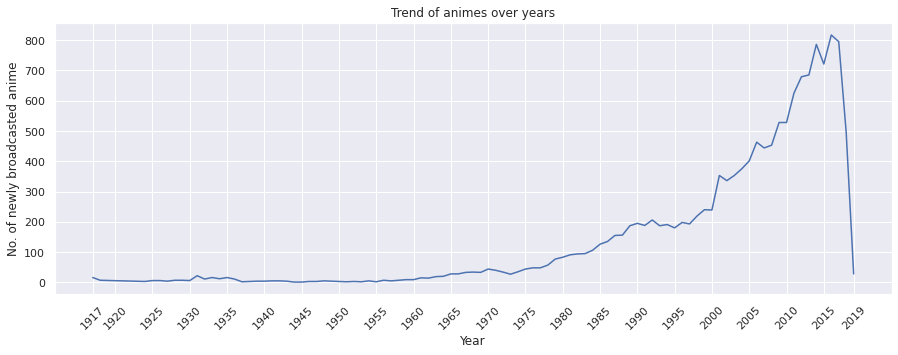

In [58]:
# Lấy ra năm trong cột 'aired_from' 
animes_over_year = animes_df.aired_from.dt.year
# Vẽ biểu đồ đường biểu diễn xu hướng
animes_count_over_year = animes_over_year.value_counts().sort_index()
animes_count_over_year.plot(
    title = 'Trend of animes over years',
    figsize = (15,5), 
    xlabel='Year',
    ylabel='No. of newly broadcasted anime'
)
# Lấy ra năm lớn nhất và nhỏ nhất
year_max = animes_over_year.max()
year_min = animes_over_year.min()
# Làm tròn 2 cận về bội số 10 gần nhất
year_max_rounded = round(year_max/10)*10
year_min_rounded = round(year_min/10)*10
# Tạo tick cách nhau 5 năm và thêm 2 cận vào
yeartick = np.arange(year_min_rounded, year_max_rounded, 5)
yeartick = np.insert(yeartick, 0, year_min)
yeartick = np.append(yeartick, year_max)
# Gán lại nhãn cho trục hoành
ax = plt.gca()
ax.set_xticks(yeartick);
ax.set_xticklabels(yeartick.astype(int), rotation = 45);

Dựa vào biểu đồ "Trend of animes over year": số lượng anime mỗi năm được tăng đáng kể từ 1917 - 2019.
- Từ năm 1917 - 1960: Số lượng anime được chiếu rất ít, dao động trong khoảng 1 đến 20.
- Từ năm 1960 - 2000: Số lượng anime được chiếu tăng đều, đạt mốc khoảng 250 vào năm 2000.
- Từ năm 2000 trở đi: Số lượng anime được chiếu tăng đột biến, đạt đỉnh hơn 800 vào khoảng năm 2016.


\* Do dữ liệu này chỉ khảo sát đến năm 2018 nên những "anime" công chiếu vào 2019 chỉ là những anime mới được công bố trước mà chưa có nhiều thông tin cụ thể khác nên số lượng còn ít.

In [37]:
animes_count_over_year.agg(['idxmin', 'idxmax', 'min', 'max'])

idxmin    1944.0
idxmax    2016.0
min          1.0
max        817.0
Name: aired_from, dtype: float64

- Năm sản xuất nhiều anime nhất là 2016.
- Năm sản xuất ít anime nhất là 1944. Khoảng thời gian này công nghệ sản xuất anime chưa phát triển, hơn nữa đây là giai đoạn cuối trong "Thế chiến thứ II" nên có lẽ nước Nhật đã dồn hết tất cả nguồn lực vào quân sự, giải trí là cái tối thiểu mà họ quan tâm.

#### Phân bố theo mùa

Text(0.5, 0, 'No. of premiered anime')

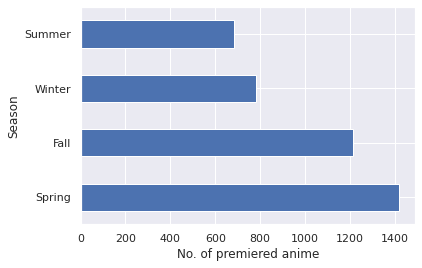

In [38]:
# Tách "season" và "year" ra thành 2 phần trong cột "premiered"
premiered_df = animes_df['premiered'].str.split(expand = True)
premiered_df.columns = ['Season', 'Year']
# Vẽ biểu đồ cột
premiered_df.Season.value_counts().plot(kind = 'barh', xlabel='Season')
plt.gca().set_xlabel('No. of premiered anime')

Hầu hết các anime được ra mắt nhiều nhất vào mùa xuân và ít nhất là mùa hè. Cũng cần lưu ý là vì cột `premiered` có tỷ lệ thiếu rất cao nên thông tin này chỉ mang tính chính xác tương đối.

## Câu 2: Phân bố thể loại, nguồn gốc của các anime

### Mục đích
- Tìm hiểu về sự phân bố số lượng anime với từng thể loại
- Tìm hiểu về sự phân bố nguồn gốc của các anime với từng thể loại

### Tiền xử lý
Ta sẽ tiến hành tiền xử lý như sau:
- Ở cột `source`, Visual novel, Light novel và Novel sẽ được thay thế thành Novel.
- Ngoại trừ Novel, Original, Unknown, Manga, Game, tất cả những giá trị còn lại sẽ được thay thế thành "Other".
- Gom nhóm theo `genre` và `source` và đếm số lượng anime tương ứng
- Với từng genre, sắp xếp theo thứ tự tăng dần của tổng số lượng anime trong từng thể loại


### Giải quyết

**Phân bố về số lượng và nguồn gốc của các thể loại anime ra sao?**

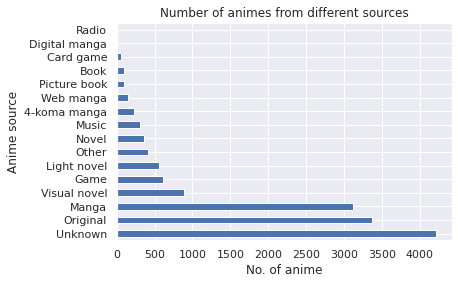

In [39]:
animes_df.source.value_counts().plot(kind='barh', title='Number of animes from different sources')
ax = plt.gca()
ax.set_xlabel('No. of anime')
ax.set_ylabel('Anime source');

Vậy 3 nguồn gốc phổ biến nhất là Original, Manga, Visual novel và Unknown.
- Manga, visual novel: anime được sản xuất dựa trên một bộ manga hoặc novel đã có từ trước.
- Original: anime được sản xuất và viết từ đầu.



In [40]:
# Thay Visual novel, Light novel thành Novel
animes_df_copy = animes_df.copy()
animes_df_copy.source = animes_df_copy.source.str.replace('(.*) novel', 'Novel', regex = True)
# Ngoại trừ Novel, Original, Unknown, Manga, Game, tất cả những giá trị còn lại sẽ được thay thế thành "Other"
index = animes_df_copy.source.isin(['Novel', 'Original', 'Unknown', 'Manga', 'Game'])
animes_df_copy.loc[~index, 'source'] = 'Other'

Text(0.5, 0, 'No. of anime')

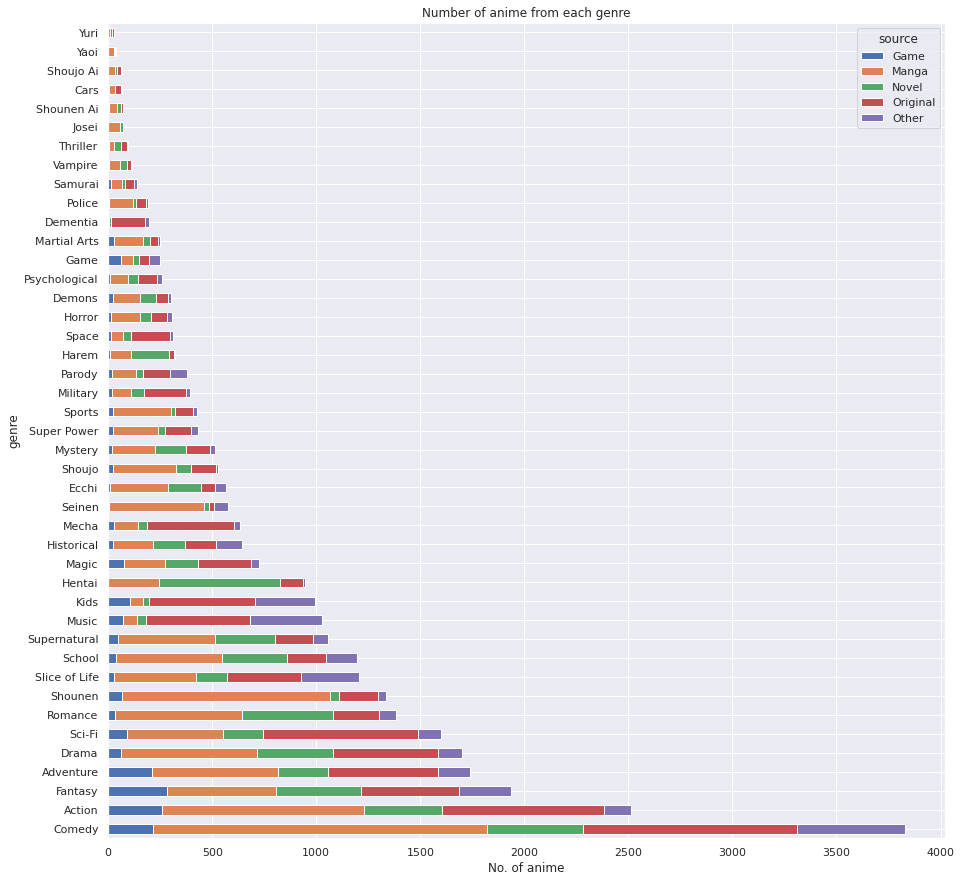

In [59]:
# Lấy ra các hàng không null của cột 'genre' và "làm phẳng"
not_null_genre = animes_df_copy.loc[~animes_df.genre.isnull(), :]
flatten_genre_df = not_null_genre.explode('genre')
# Đếm tần số của từng thể loại - nguồn gốc
genre_count = flatten_genre_df.groupby(['genre', 'source']).size()
# Chuyển multiindex thành dataframe
genre_count = genre_count.unstack()
# Bỏ cột unknown
del genre_count['Unknown']
# Sắp xếp theo thứ tự tăng dần của số lượng anime trong từng thể loại
genre_count['sum'] = genre_count.sum(axis = 1)
genre_count.sort_values('sum', ascending = False, inplace = True)
# Vẽ biểu đồ
del genre_count['sum']
genre_count.plot(
    kind = 'barh',
    figsize = (15, 15),
    stacked = True, 
    title='Number of anime from each genre'
)

ax = plt.gca()
ax.set_xlabel('No. of anime')

- Nếu xét tổng thể thì anime có nguồn gốc từ `origin` nhiều hơn anime có nguồn gốc `manga`. Nhưng với những thể loại top đầu thì nguồn gốc từ `manga` có vẻ chiếm ưu thế (nhất là thể loại `Shounnen` - Những bộ như Naruto, HunterxHunter, One Piece vốn là những manga rất nổi tiếng). 
- Tuy nhiên một số thể loại khác như `Music`, `Kids`, `Mecha` thì nguồn gốc `original` lại chiểm ưu thế. Điều này có thể giải thích là ta vốn không có nhiều thể loại manga về `Music`; còn thể loại `Mecha` thì chủ yếu để bán đồ chơi lấy ý tưởng từ các nhân vật trong anime đó. Hơn nữa những thể loại này thì đọc truyện không hấp dẫn như xem phim nên ta cũng vốn có ít những manga thuộc các thể loại này để chuyển thể (nhận xét có phần mang tính chủ quan).

**Thể loại nào có nhiều/ít anime nhất?**

_Tính ra con số chính xác_

In [42]:
top_genre = flatten_genre_df.groupby('genre').size().sort_values()
print('Top 5 most', top_genre.head())
print('\nTop 5 least', top_genre.tail())

Top 5 most genre
Yaoi          39
Yuri          41
Shoujo Ai     67
Shounen Ai    79
Josei         81
dtype: int64

Top 5 least genre
Drama        2294
Adventure    2582
Fantasy      2703
Action       3253
Comedy       5251
dtype: int64


Vậy:
- top 3 thể loại có nhiều anime nhất là: `Comedy`, `Action`, `Fantasy`
- top 3 thể loại có ít anime nhất là: `Yaoi`, `Yuri`, `Shoujo Ai`

---
## Câu 3: Thể loại anime được yêu thích nhất, mối quan hệ với điểm

### Mục đích
- Tìm hiểu những thể loại anime nào được yêu thích nhất và ít được yêu thích nhất. Có phải thể loại có nhiều anime là được nhiều người thích hay không?
- Tìm hiểu mối quan hệ tương quan giữa lượng người xem và điểm số (score) trung bình của anime.

### Tiền xử lý
- Tạo một thông số với là `favorscore` (như mô tả bên dưới).
- Gom nhóm các thể loại và tính trung bình `favorscore`.
- Đánh trọng số để ngăn các thể loại có ít anime có điểm cao (mô tả chi tiết hơn ở bên dưới).

### Giải quyết

Để xem xét "mức độ được yêu thích" của từng thể loại, em sẽ xét tương quan giữa 2 thông số là `score` (điểm đánh giá anime trên thang 10) và `favorite` (số lượng người yêu thích anime đó). Ta có thể có các trường hợp:

- `score` cao, `favorite` cao: rất được yêu thích.
- `score` cao, `favorite` thấp: điểm cao nhưng ít người yêu thích -> thiên vị.
- `score` thấp, `favorite` cao: bất thường.

Em sẽ tạo một tham số với là `favorscore` với công thức:

$$
\mathrm{favorscore} = \mathrm{score}\times\log(\mathrm{favorites})
$$

Nói cách khác, một bộ anime được xem là được "yêu thích nhiều" nếu có cả `score` và `favorite` đều cao. Một thể loại được yêu thích nhiều nếu trung bình `favorscore` của các anime thuộc thể loại đó cao.

Lý do sử dụng hàm log: để "nerf" lại các anime có `favorite` rất cao. Ở đây em muốn đến một mức độ nhất định nào đó thì `favorite` sẽ không còn là yếu tố quan trọng nữa.

**Trước tiên thử xem 2 đại lượng này có quan hệ với nhau như thế nào**

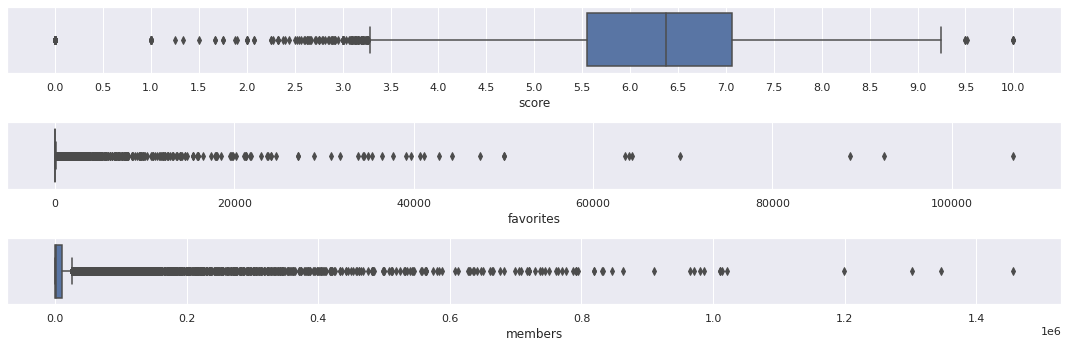

In [43]:
# Xem phân bố của cột `score`
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 5))
sns.boxplot(data=animes_df, x='score', ax=ax1)
ax1.set_xticks(np.arange(0, 10 + 0.5, 0.5))

sns.boxplot(data=animes_df, x='favorites', ax=ax2)
sns.boxplot(data=animes_df, x='members', ax=ax3)
plt.tight_layout()

Có thể thấy 50% các anime có điểm nằm trong khoảng từ trên 5.5 đến trên 7.0. Có một số anime "đặc biệt" có điểm lên đến 10, ta sẽ xem sau.

<AxesSubplot:xlabel='members', ylabel='score'>

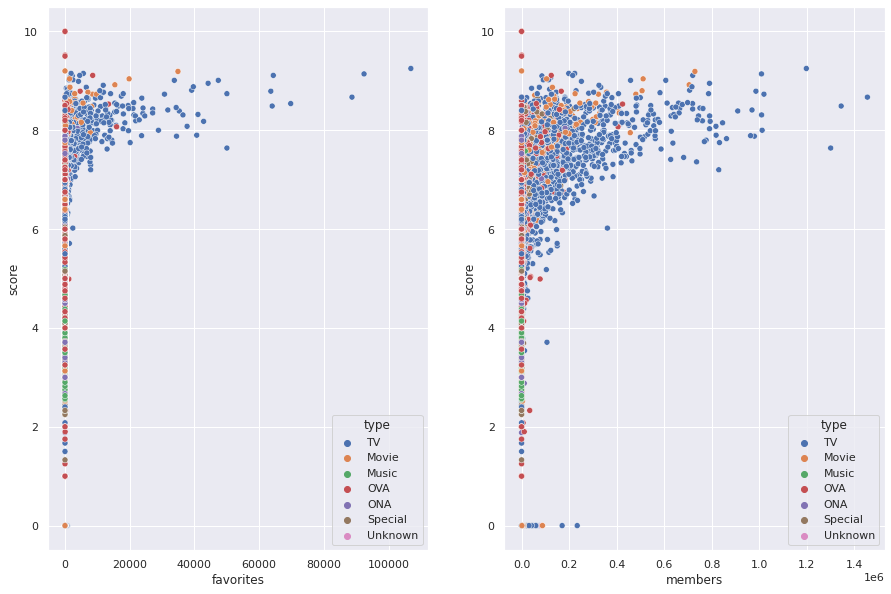

In [44]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))
sns.scatterplot(
    data=animes_df,
    x='favorites',
    y='score',
    hue='type',
    ax=ax1
)

sns.scatterplot(
    data=animes_df,
    x='members',
    y='score',
    hue='type',
    ax=ax2
)

Có thể thấy những bộ đông người xem chiếm tỉ lệ rất ít, và càng đông người xem thì điểm sẽ càng cao và bớt "phân tán" hơn. Những bộ "tệ" thì có ít người xem hơn những bộ "tốt".

Cá biệt: những bộ rất ít người xem hoặc ít người thích lại có điểm cận 10. Điều này cũng dễ hiểu vì nếu có nhiều người xem thì ý kiến sẽ đa chiều hơn nên sẽ kéo điểm trung bình chung xuống. Ngoài ra, ta cũng có thể thấy `type` của những bộ này là "OVA", tức là những video dạng "anime" bonus bán riêng với merchandise, nên chủ yếu là "fan cứng" sẽ mua nên điểm cũng sẽ bị biased. 

**Nhìn chung, những bộ có đông người xem thì sẽ có điểm trong khoảng 7 - 9** (tuy nhiên theo boxplot được vẽ ở trên thì những bộ này chỉ chiếm khoảng 25%). Theo kinh nghiệm, đây cũng là những bộ nên xem trong thực tế. Ngoài ra, **loại hình anime có lượng người xem nhiều nhất là TV anime**.

In [45]:
def standardize(col):
    return (col - col.min()) / (col.max() - col.min())

animes_df['favorscore'] = animes_df.score * np.log(animes_df.favorites)
animes_df[['score', 'members', 'favorscore',
           'popularity', 'rank']].sort_values('favorscore', ascending=False)

/home/hellolinux/miniconda3/envs/min_ds-env/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,score,members,favorscore,popularity,rank
anime_id,,,,,
5114,9.25,1199091,107.111321,4,1.0
9253,9.14,1010330,104.507959,8,5.0
11061,9.11,720920,100.870299,35,8.0
1535,8.67,1456378,98.777051,1,51.0
1575,8.79,986897,97.222576,9,30.0
...,...,...,...,...,...
37915,0.00,123,NaN,12627,NaN
35155,0.00,31,NaN,14351,11059.0
37428,0.00,21,NaN,14456,9865.0


Có thể thấy cột `favorscore` phản ánh được thông tin của cả 2 cột `popularity` (xếp hạng theo `members`) và `rank` (xếp hạng theo score), mặc dù không đều nhau.

Nếu lấy trung bình thì những thể loại có ít anime sẽ có "lợi thế", do đó em sẽ nhân thêm trọng số `sqrt(số anime thuộc thể loại đó)` với mỗi thể loại. Con số này sau đó sẽ được chuẩn hóa về $[0, 1]$ để dễ hình dung.

Việc đánh trọng số này gắn liền với **giả thiết là thể loại có càng nhiều anime thì có thể sẽ càng hay**, mặc dù điều này trong thực tế có thể không đúng lắm.

In [46]:
# Flatten cột genre
animes_df.favorscore = animes_df.favorscore.fillna(0)
animes_df.favorscore = animes_df.favorscore.replace(-np.inf, 0)

genre_expl_df = animes_df.explode('genre')

# Đánh trọng số cho từng genre, gom nhóm và lấy trung bình điểm
genre_weights = np.sqrt(genre_expl_df.groupby('genre').size())
animes_genres_ranking = genre_expl_df.groupby('genre')['favorscore'].mean() * genre_weights
# Chuẩn hóa
animes_genres_ranking = standardize(animes_genres_ranking)

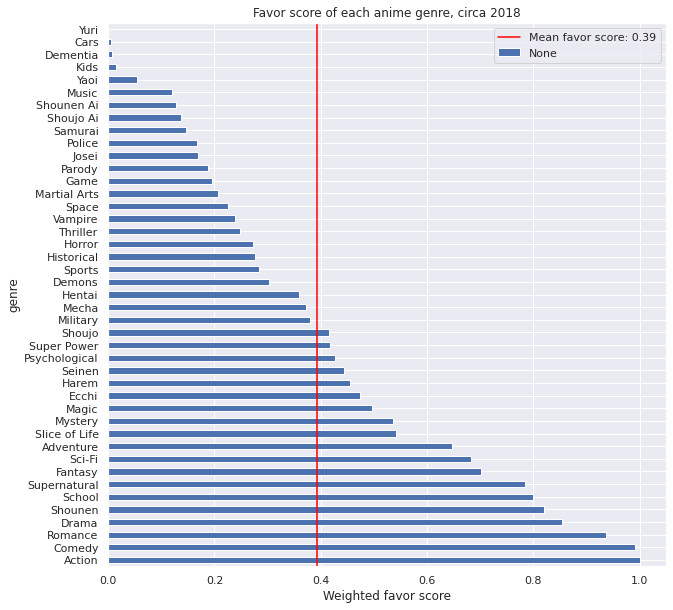

In [47]:
# Score trung bình
mean_fav_score = animes_genres_ranking.mean()

animes_genres_ranking.sort_values(inplace=True, ascending=False)
animes_genres_ranking.plot(
    title='Favor score of each anime genre, circa 2018',
    kind='barh',
    figsize=(10, 10)
)
# Vẽ đường thẳng trung bình để so sánh điểm
ax = plt.gca()
ax.axvline(x=mean_fav_score, label='Mean favor score: {:3.2f}'.format(mean_fav_score), color='red')
ax.set_xlabel('Weighted favor score')
plt.legend()

Yuri, Car, Cars, Kids, Yaoi là những thể loại ít được yêu thích nhất.

Những thể loại được yêu thích nhất là Action, Comedy, Romance, Drama, ... Thử xem thử chúng là những bộ ra sao:

In [48]:
genre_expl_df.loc[genre_expl_df.genre.isin(['Action', 'Comedy', 'Romance']), 
    ['title', 'popularity', 'rank', 'score']].sort_values('popularity').drop_duplicates().head(20)

,title,popularity,rank,score
anime_id,,,,
37286,It&#039;s My Life,0,0.0,0.00
20261,W-Tails Cat: A Strange Presence,0,0.0,6.09
20263,W・TAILS CAT - A STRANGE PRESENCE,0,0.0,0.00
37873,BanG Dream! Garu☆PICO,0,0.0,0.00
37866,Uchuu Senkan Tiramisù Specials,0,0.0,0.00
16498,Shingeki no Kyojin,2,110.0,8.49
11757,Sword Art Online,3,1259.0,7.64
5114,Fullmetal Alchemist: Brotherhood,4,1.0,9.25
30276,One Punch Man,5,44.0,8.73


Trừ những bộ có popularity là 0 (chưa chiếu/không xác định) thì còn lại toàn là những bộ top, những bộ kinh điển. Vậy thì có vẻ kết quả mà ta tìm được là hợp lý.

<AxesSubplot:xlabel='members', ylabel='favorscore'>

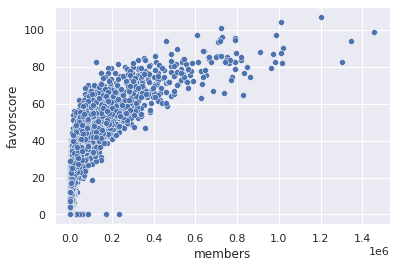

In [49]:
sns.scatterplot(
    data=animes_df,
    x='members',
    y='favorscore'
)

Ta cũng thấy được có vẻ anime càng nhiều người xem thì cũng sẽ càng nhiều người thích. Có một vài anime có nhiều người xem nhưng lại không ai thích.

---
## Câu 4: Studio, chất lượng của anime và sự "chuyên môn hóa" thể loại của các studio

### Mục đích
- Tìm hiểu xem những studio nào được yêu thích nhất (`favorscore` trung bình cao nhất).
- Tìm hiểu xem các studio có "thế mạnh" trong một thể loại cụ thể nào đó hay không (vì trong thực tế điều này _có_ tồn tại).

### Tiền xử lý (1)
Cho ý thứ nhất.

- Gom nhóm theo cột `studio` và lấy `favorscore` trung bình.
- Đánh trọng số để ngăn các studio có ít anime có điểm cao, scale về $[0, 1]$.
- Sort theo điểm và lấy ra top 25 studio.

### Tiền xử lý (2)
Cho ý thứ 2.

- Gom nhóm lại theo cả `studio` và `genre`.
- Với mỗi cặp `studio` và `genre`, tính lại trọng số (dựa trên số lượng anime thuộc vào một genre mà studio đó sản xuất).
- Với mỗi `genre` và `studio`, tính trung bình `favorscore` và đánh trọng số (lý do như cũ).
- Vẽ biểu đồ cho một vài thể loại để quan sát.

### Giải quyết

Để biết studio nào làm ra những bộ anime "chất lượng" nhất, ta sẽ sử dụng lại thông số `favorscore` đã tính ở trên. Tương tự, nếu lấy trung bình thì những studio làm ít anime sẽ có lợi thế, do đó em sẽ nhân thêm trọng số `log(số anime được làm bởi studio đó)` với mỗi studio. Lý do dùng hàm `log` tương tự như ở trên.

Con số này sau đó sẽ được chuẩn hóa về [0, 1] để dễ hình dung.

Còn về sự "chuyên môn hóa" các thể loại của các studio thì với mỗi thể loại trong số 8 thể loại mà em quan tâm (tự chọn một cách thủ công) thì em sẽ lấy ra 5 studio có "điểm" cao nhất với từng thể loại.

**Studio nào có chất lượng anime "tốt"?**

In [50]:
# Flatten cột studio
studio_expl_df = animes_df.explode('studio')
studio_expl_df.studio.nunique()

509

Có đến 509 studio nên em chỉ show ra top 25 studio mà thôi.

In [51]:
# Tính trọng số để đánh
studio_weights = np.log(studio_expl_df.groupby('studio').size())
# Gom nhóm theo studio và tính score trung bình
studios_ranking = studio_expl_df.groupby('studio')['favorscore'].mean() * studio_weights
# Lấy ra 20 studio có điểm cao nhất và chuẩn hóa
studios_ranking = studios_ranking.sort_values(ascending=False).head(25)
studios_ranking = standardize(studios_ranking)

In [52]:
# Không xét các con số, chỉ xem tên studio thôi
top_studios = studios_ranking.index.to_list()
top_studios

['A-1 Pictures',
 'Bones',
 'Madhouse',
 'Kyoto Animation',
 'Studio Deen',
 'Brain&#039;s Base',
 'Shaft',
 'J.C.Staff',
 'Production I.G',
 'Silver Link.',
 'White Fox',
 'Gonzo',
 'Satelight',
 'Lerche',
 'David Production',
 'Xebec',
 'Studio Pierrot',
 'Manglobe',
 'ufotable',
 'Wit Studio',
 'Sunrise',
 'Diomedea',
 'P.A. Works',
 'Artland',
 '8bit']

**"Chuyên môn hóa" về thể loại anime của các studio**

In [53]:
interested_genres = ['Shounen', 'Horror', 'Adventure', 'Sci-Fi', 
               'Slice of Life', 'Mecha', 'Music', 'Fantasy']

In [54]:
# Lấy ra các hàng có genre thuộc vào tập trên
int_genres_df = genre_expl_df[genre_expl_df.genre.isin(interested_genres)]
# Flatten cột studio
int_genres_df = int_genres_df.explode('studio')

studio_genre_group = int_genres_df.groupby(['genre', 'studio'])

# Với mỗi genre và studio, tính ra số lượng anime tương ứng và lấy căn (tính trọng số)
# Tức ta sẽ tính lại trọng số của mỗi studio theo mỗi genre 
# Studio nào sản xuất anime thuộc thể loại đó thấp sẽ có trọng số cho thể loại đó thấp
n_animes = len(animes_df)
studio_genre_weights = np.sqrt(studio_genre_group.size())

# Với mỗi genre, lấy trung bình theo studio
int_genres_df = studio_genre_group['favorscore'].mean()

In [55]:
genres_mean_matrix = int_genres_df.unstack()
studio_weight_matrix = studio_genre_weights.unstack()
# Đánh trọng số
# Do thứ tự các hàng và cột trong 2 ma trận này giống nhau nên nhân sẽ match
int_genres_matrix = genres_mean_matrix * studio_weight_matrix

In [56]:
int_genres_matrix

studio,10Gauge,2:10 Animation,33 Collective,3xCube,8bit,A-1 Pictures,A-Line,A-Real,A.C.G.T.,ACC Production,...,Zexcs,domerica,dwarf,feel.,iDRAGONS Creative Studio,ixtl,pH Studio,production doA,teamKG,ufotable
genre,,,,,,,,,,,,,,,,,,,,,
Adventure,NaN,NaN,0.0,NaN,39.424769,257.472130,NaN,NaN,58.423950,11.604177,...,75.762529,NaN,0.000000,NaN,14.181791,NaN,0.0,NaN,NaN,83.380183
Fantasy,NaN,0.000000,0.0,40.511805,74.980171,331.220999,0.0,NaN,35.784172,11.604177,...,92.216190,NaN,0.000000,74.178997,NaN,NaN,NaN,NaN,31.521407,184.732161
Horror,NaN,NaN,NaN,NaN,NaN,82.440165,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,51.801584,NaN,NaN,NaN,30.811265,NaN,20.103541
Mecha,NaN,NaN,NaN,NaN,114.739273,94.210457,NaN,NaN,11.985652,NaN,...,17.068298,NaN,NaN,12.751655,NaN,49.734697,NaN,NaN,NaN,15.810266
Music,7.511093,NaN,NaN,NaN,54.488768,144.395444,NaN,NaN,NaN,NaN,...,26.596701,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.000000
Sci-Fi,0.000000,NaN,NaN,NaN,106.442188,200.595202,NaN,NaN,52.716654,NaN,...,57.346002,NaN,NaN,53.540608,NaN,49.734697,0.0,NaN,NaN,53.080629
Shounen,NaN,NaN,NaN,40.511805,NaN,299.988658,NaN,NaN,30.697444,NaN,...,68.168243,NaN,NaN,43.272048,NaN,NaN,NaN,NaN,NaN,38.799919
Slice of Life,0.000000,7.116674,NaN,NaN,55.000113,209.981022,NaN,5.617187,66.105489,NaN,...,86.600709,14.698971,7.426148,111.094539,NaN,NaN,NaN,24.751735,NaN,36.669635


Việc đánh trọng số này giả sử rằng studio nào sản xuất nhiều anime về một thể loại nào đó thì _có thể sẽ làm thể loại đó hay_. Đây cũng chính là... điều mà ta đang cố gắng kiểm chứng nên có vẻ phương pháp "trọng số" này không hợp lý lắm. Nhưng nếu không có thì trong bảng xếp hạng sẽ xuất hiện nhiều studio vô danh chỉ sản xuất có một vài anime.

Tuy nhiên điều này là _chưa chắc_. Nếu kiểm tra sẽ thấy studio `Kyoto Animation` có trọng số cho thể loại `Slice of Life` khá thấp, nhưng ở dưới đây, studio này lại đứng đầu bảng xếp hạng cho thể loại này.

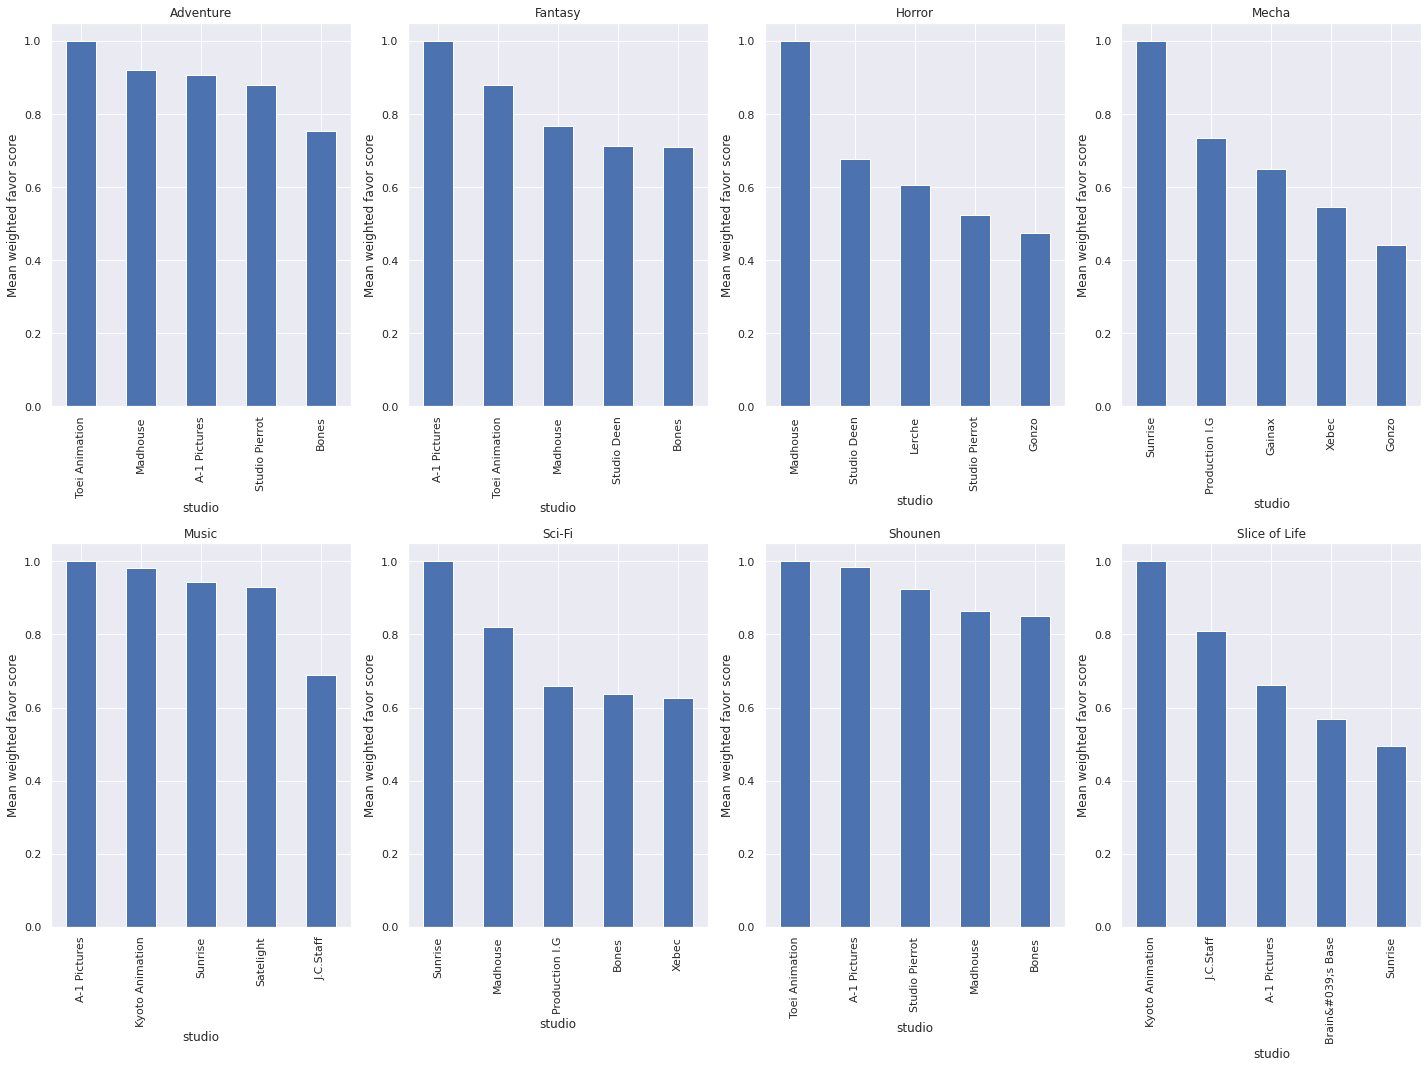

In [57]:
fig, axes = plt.subplots(2, 4, figsize=(20, 15))
axes = axes.ravel()

# Duyệt qua từng thể loại
for i, genre in enumerate(int_genres_matrix.index):
    genre_series = int_genres_matrix.loc[genre, :]
    
    genre_series.sort_values(ascending=False, inplace=True)
    genre_series = standardize(genre_series)
    
    genre_series.head(5).plot(
        kind='bar',
        title=genre,
        ax=axes[i]
    )
    axes[i].set_ylabel('Mean weighted favor score')
fig.tight_layout()

Có thể thấy được với từng thể loại anime khác nhau, ta có các studio khác nhau góp mặt trong top 5. Có một số thể loại thì chênh lệch là không nhiều, nhưng có 1 số thể loại lại có chênh lệch lớn.

Ví dụ (có so sánh với thực tế):
- Sunrise mạnh về anime thuộc thể loại Mecha và Sci-Fi (đây là "nhà thầu" của Mobile Suit Gundam, tượng đài all-time của thể loại Mecha và Sci-Fi).
- A-1 picture đứng đầu bảng với thể loại Fantasy và Shounen, theo sau là Toei Animation. A-1 Picture là thầu của nhiều bộ rất nổi thuộc 2 thể loại này như Natatsu no Taizai (Thất hình Đại tội), Sword Art Online, Persona, Fairy Tail ...
- Adventure, Shounen có khá nhiều studio góp mặt và "same same" nhau, nhưng nổi nhất là Toei Animation (đây là studio sản xuất ra Dragon Ball, One Piece, Sailor Moon, Slam Dunk...).
- Với Horror thì Madhouse là studio đứng đầu, vượt xa các studio khác. Em không xem horror nên không kiểm chứng được, nhưng khi tham khảo ý kiến từ một vài người bạn của em thì nhận được câu trả lời là các anime horror của Madhouse "toàn top tier", " all time classic".
- Kyoto Animation, một studio cực kỳ nổi tiếng với các bộ anime đời thường, không bất ngờ khi dẫn đầu top với genre "Slice of Life".
- Sunrise, A-1 Pictures và Kyoto Animation là 3 studio có điểm gần bằng nhau với thể loại Music. Đây là các studio đã sản xuất ra những bộ anime âm nhạc rất có tiếng, bao gồm Love Live! (Sunrise), Shigatsu wa Kimi no Uso, The iDOLM@STER (A-1), K-ON, Hibike (KyoAni).

# Nhìn lại quá trình làm đồ án

## Thuận lợi
- Chủ đề cả hai bạn trong nhóm cùng thích nên có hứng làm.
- Biết thêm nhiều studio anime mới mà trước đây chưa biết mặc dù nó khá nổi.

## Khó khăn

- Cả 2 đều chưa học môn "Nhập môn khoa học dữ liệu" nên chưa biết rõ các phương pháp thống kê để phân tích dữ liệu.
- Chưa biết cách xử lý những trường hợp như là "studio có rất ít anime thì có điểm trung bình cao" nên đã bịa ra cách nhân trọng số, nhưng cũng có vẻ chưa hợp lý lắm.
- Thời điểm cuối kỳ phải ôn tập cho những môn khác với lượng kiến thức nhiều hơn nên tới còn 1 tuần cuối trước khi deadline nhóm mới bắt đầu làm, thời gian có vẻ không kịp nhưng cuối cùng cũng kịp.
- "Chọn nhầm dữ liệu" (cũng là dataset của MyAnimeList nhưng có ít cột hơn) nên ít thông tin để xem xét, phải đổi sang tập dữ liệu khác có nhiều cột hơn để có nhiều thông tin cần quan sát hơn.
- _Có thể_ gặp phải "thiên kiến xác nhận" nên có khả năng kết quả khám phá của nhóm trong bài làm này vì lý do gì đó bị sai nhưng vẫn cố gắng (vô tình) "hợp lý hóa" nó mà không hay biết.
- Chưa quen với cách dùng git nâng cao, khó xử lý bằng dòng lệnh nếu merge xảy ra xung đột.

## Nếu có thêm thời gian nhóm sẽ làm gì?
- Tìm cách xử lý trường hợp "genre/studio có ít anime sẽ có điểm trung bình cao".
- Đổi sang một dataset MyAnimeList mới cập nhật gần đây hơn (có thêm một vài cột hữu ích như số lượng người drop một anime, ...), từ đó sẽ có kết luận chính xác hơn về "độ yêu thích".
- Sử dụng thuật toán ML để dự đoán điểm anime dựa trên một số cột quan trọng (?).

# Tài liệu tham khảo

1. [Pandas documentation](https://pandas.pydata.org/docs/).
2. [Cross entropy](https://en.wikipedia.org/wiki/Cross_entropy) (ý tưởng "đánh trọng số" của nhóm xuất phát từ đây).
3. [What does the members number mean in the statistics?](https://myanimelist.net/forum/?topicid=443491).